### One Bubble

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import h5py
import EWdata

In [14]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'

file_path = os.path.join(root_path, 'one_bubble', 'raw_data_1', 'one_bubble_den_1.h5')
h5file = EWdata.H5Reader(file_path)
dset = h5file.dataset_
dshape = h5file.shape_

c1 = EWdata.constants(eta = 6.0, dx = 0.125, nSize = 128)

print(h5file.attrs_)

{'col_name_0': b'TotalEnergy', 'col_name_1': b'MagneticEnergy', 'col_name_2': b'HiggsMagnitude2'}


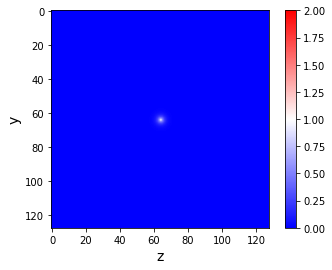

In [15]:
# Higgs magnitude squared
data_ = dset[:,:,dshape[2]/2,2] / c1.eta()**2 ### in units of eta2
plt.imshow(data_, interpolation = 'bilinear', 
           vmin = 0, vmax = 2,
           cmap = 'bwr')
plt.colorbar()
plt.xlabel('z', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.show()

### Example of random nucleation

### Two Bubbles

In [ ]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'

file_path = os.path.join(root_path, 'two_bubbles', 'raw_data_1', 'one_bubble_den_1.h5')
h5file = EWdata.H5Reader(file_path)
dset = h5file.dataset_
dshape = h5file.shape_

c1 = EWdata.constants(eta = 6.0, dx = 0.125, nSize = 128)

In [ ]:
# Higgs magnitude squared
data_ = dset[:,:,dshape[2]/2,2] / c1.eta()**2 ### in units of eta2
plt.imshow(data_, interpolation = 'bilinear', 
           vmin = 0, vmax = 2,
           cmap = 'bwr')
plt.colorbar()
plt.xlabel('z', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.show()

In [ ]:
# magnetic energy density
data_ = dset[:,:,dshape[2]/2,1] / c1.mH()**4 ### norm to units mH^4
plt.imshow(data_, interpolation = 'bilinear', vmax = 0.03)
plt.colorbar()
plt.xlabel('z', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.show()

### Non-random bubbles